## Importing data using unpickle as we did in first example, importing torch libraries to build a CNN

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
dict1 = unpickle('data_batch_1')
dict2 = unpickle('data_batch_2')
dict3 = unpickle('data_batch_3')
dict4 = unpickle('data_batch_4')
dict5 = unpickle('data_batch_5')
dict6 = unpickle('test_batch')

labels1 = dict1.get(b'labels')
labels1 = np.array(labels1)
labels2 = dict2.get(b'labels')
labels2 = np.array(labels2)
labels3 = dict3.get(b'labels')
labels3 = np.array(labels3)
labels4 = dict4.get(b'labels')
labels4 = np.array(labels4)
labels5 = dict5.get(b'labels')
labels5 = np.array(labels5)
labels6 = dict6.get(b'labels')
labels6 = np.array(labels6)

data1 = dict1.get(b'data')
data1 = np.array(data1)
data2 = dict2.get(b'data')
data2 = np.array(data2)
data3 = dict3.get(b'data')
data3 = np.array(data3)
data4 = dict4.get(b'data')
data4 = np.array(data4)
data5 = dict5.get(b'data')
data5 = np.array(data5)
data6 = dict6.get(b'data')
data6 = np.array(data6)

data = np.concatenate((data1,data2,data3,data4,data5,data6), axis= 0)
labels = np.concatenate((labels1,labels2,labels3,labels4,labels5,labels6), axis=0)

data.shape, labels.shape

((60000, 3072), (60000,))

## I created a fuction which is similar to the pervious one. This function used to return images and one hot labels. But now function should return any output in form of Tensor. So I redefined it. It now noramalizes the data, splits it in Train and Test part, reshapes it so that it can be fed to the network that we will be defining. It will return images and data in form of Tensor for train and test purpose.

In [4]:
def two_objects_two_labels(data, labels, l1, l2):
    indices_label0 = np.nonzero(labels == l1)
    indices_label1 = np.nonzero(labels == l2)
    a = np.array(np.nonzero(labels == l1))
    b = np.array(np.nonzero(labels == l2))
    c = np.concatenate((a,b), axis = 1).flatten()
    np.random.shuffle(c)
    x = data[c]
    y = labels[c]
    y = np.where(y==l1, 0, y)
    y = np.where(y==l2, 1, y)
    X_train = x/255
    X_train = (X_train - np.mean(X_train))/np.std(X_train)
    Y_train = y
    x_train = X_train[:9600]
    y_train = Y_train[:9600]
    x_test = X_train[9600:12000]
    y_test = Y_train[9600:12000]
    y_train = y_train.reshape(len(y_train),1)
    y_test = y_test.reshape(len(y_test),1)
    y_test = y_test.T
    X_train_tensor = torch.tensor(x_train.reshape(9600,3,32,32)).double()
    X_test_tensor = torch.tensor(x_test.reshape(2400,3,32,32)).double()
    y_exp = torch.tensor(y_train).long()
    y_expp = y_exp.reshape(9600,)
    Y_test_tensor = torch.tensor(y_test).long()
    Y_test_expected = Y_test_tensor.reshape(2400,)
    
    return X_train_tensor,y_expp, X_test_tensor ,Y_test_expected

In [5]:
X_train_tensor,Y_train_tensor, X_test_tensor ,Y_test_expected = two_objects_two_labels(data, labels, 1, 2)

In [6]:
X_train_tensor.shape,Y_train_tensor.shape, X_test_tensor.shape ,Y_test_expected.shape

(torch.Size([9600, 3, 32, 32]),
 torch.Size([9600]),
 torch.Size([2400, 3, 32, 32]),
 torch.Size([2400]))

## Created a class called Network. This class shows what out CNN will be. I am going to use 2 convolutional layers. First will be using 6 5 * 5 filter. Second wil use 12 5 * 5 filters. After that we will use Fully connected layers as I have defined ahead.  

In [7]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6 ,kernel_size =5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size =5)
        
        self.fc1 = nn.Linear(in_features = 12*5*5, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 2)
        
    def forward(self, t):
        t = t 
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        t = t.reshape(-1, 12*5*5)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.fc2(t)
        t = F.relu(t)
        t = self.out(t)
      
        return t        

## Training the network : I am using Cross Entropy loss, Adam optimizer to update weights. For now I have tested model for 500 epochs, with batch size of 10. This step will print the loss per epoch, training accuracy and plot of loss vs epochs. 

Epoch number = 1
Loss function value:  [0.30795678]


Epoch number = 2
Loss function value:  [0.17924904]


Epoch number = 3
Loss function value:  [0.14541773]


Epoch number = 4
Loss function value:  [0.12223545]


Epoch number = 5
Loss function value:  [0.09767085]


Epoch number = 6
Loss function value:  [0.07820859]


Epoch number = 7
Loss function value:  [0.06963401]


Epoch number = 8
Loss function value:  [0.0582899]


Epoch number = 9
Loss function value:  [0.04676203]


Epoch number = 10
Loss function value:  [0.04601426]


Epoch number = 11
Loss function value:  [0.03377217]


Epoch number = 12
Loss function value:  [0.03571313]


Epoch number = 13
Loss function value:  [0.03327275]


Epoch number = 14
Loss function value:  [0.02756468]


Epoch number = 15
Loss function value:  [0.02041587]


Epoch number = 16
Loss function value:  [0.02775508]


Epoch number = 17
Loss function value:  [0.02149697]


Epoch number = 18
Loss function value:  [0.02349854]


Epoch number = 19
Lo

Epoch number = 144
Loss function value:  [1.45163719e-13]


Epoch number = 145
Loss function value:  [1.42385108e-13]


Epoch number = 146
Loss function value:  [1.39711344e-13]


Epoch number = 147
Loss function value:  [1.3713602e-13]


Epoch number = 148
Loss function value:  [1.34650902e-13]


Epoch number = 149
Loss function value:  [1.32245465e-13]


Epoch number = 150
Loss function value:  [1.29940063e-13]


Epoch number = 151
Loss function value:  [1.27703727e-13]


Epoch number = 152
Loss function value:  [1.25541684e-13]


Epoch number = 153
Loss function value:  [1.23451596e-13]


Epoch number = 154
Loss function value:  [1.21429024e-13]


Epoch number = 155
Loss function value:  [1.19472025e-13]


Epoch number = 156
Loss function value:  [1.17576296e-13]


Epoch number = 157
Loss function value:  [1.15739108e-13]


Epoch number = 158
Loss function value:  [1.13951857e-13]


Epoch number = 159
Loss function value:  [1.12230572e-13]


Epoch number = 160
Loss function value:  

Epoch number = 281
Loss function value:  [3.90058819e-14]


Epoch number = 282
Loss function value:  [3.87958415e-14]


Epoch number = 283
Loss function value:  [3.85881142e-14]


Epoch number = 284
Loss function value:  [3.83825379e-14]


Epoch number = 285
Loss function value:  [3.81784188e-14]


Epoch number = 286
Loss function value:  [3.79780004e-14]


Epoch number = 287
Loss function value:  [3.77787153e-14]


Epoch number = 288
Loss function value:  [3.75816045e-14]


Epoch number = 289
Loss function value:  [3.73862284e-14]


Epoch number = 290
Loss function value:  [3.71933965e-14]


Epoch number = 291
Loss function value:  [3.70021606e-14]


Epoch number = 292
Loss function value:  [3.68128907e-14]


Epoch number = 293
Loss function value:  [3.6625263e-14]


Epoch number = 294
Loss function value:  [3.64400408e-14]


Epoch number = 295
Loss function value:  [3.62555819e-14]


Epoch number = 296
Loss function value:  [3.60745693e-14]


Epoch number = 297
Loss function value:  

Epoch number = 418
Loss function value:  [2.22973954e-14]


Epoch number = 419
Loss function value:  [2.22274976e-14]


Epoch number = 420
Loss function value:  [2.21579005e-14]


Epoch number = 421
Loss function value:  [2.20886041e-14]


Epoch number = 422
Loss function value:  [2.20198859e-14]


Epoch number = 423
Loss function value:  [2.19516303e-14]


Epoch number = 424
Loss function value:  [2.18836292e-14]


Epoch number = 425
Loss function value:  [2.1815813e-14]


Epoch number = 426
Loss function value:  [2.17486908e-14]


Epoch number = 427
Loss function value:  [2.16821006e-14]


Epoch number = 428
Loss function value:  [2.16159035e-14]


Epoch number = 429
Loss function value:  [2.15500071e-14]


Epoch number = 430
Loss function value:  [2.14842958e-14]


Epoch number = 431
Loss function value:  [2.14193246e-14]


Epoch number = 432
Loss function value:  [2.13547467e-14]


Epoch number = 433
Loss function value:  [2.1290215e-14]


Epoch number = 434
Loss function value:  [

Text(0, 0.5, 'Loss')

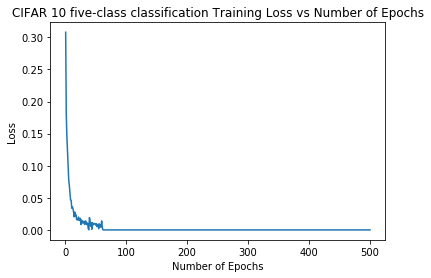

In [8]:
network = Network()
network = network.double()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(network.parameters(), lr = 0.001)
epochs = 500
loss_history = []
loss_per_epoch = np.zeros((epochs,1))
batch_size = 10
train_data_len = len(Y_train_tensor)
for j in range(epochs):
    for i in range(int(train_data_len/batch_size)):
        batch_start =  i*batch_size
        batch_end = (i+1)*batch_size
        x_trainb_tensor = X_train_tensor[batch_start:batch_end]         ### Get batch of images
        y_trainb_tensor = Y_train_tensor[batch_start:batch_end]         ### Get batch of labels
        preds = network(x_trainb_tensor)                                ### Pass the batch  
        loss = criterion(preds, y_trainb_tensor)                        ### Calculate loss                                                            
        loss.backward()                                                 ### Calculate gradients
        optimizer.step()                                                ### Update weights
        optimizer.zero_grad()                                                    
        loss_history.append(loss.item())
        
    loss_array = np.array(loss_history)
    loss_per_epoch[j] = np.mean(loss_array)
    loss_history = []
    
    print('Epoch number = ' + str(j+1))
    print('Loss function value: ', loss_per_epoch[j])
    print('\n')

    

total = len(Y_train_tensor)
correct = 0
for i in range(96):
    outputs = network(X_train_tensor[100*i:100*(i+1)])
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == Y_train_tensor[100*i:100*(i+1)]).sum().item()
print('Accuracy of the network on the 2 labels test images:'+ str((correct/total)*100))

        
yy = loss_per_epoch
xx = np.arange(1,epochs+1)
plt.plot(xx,yy)
plt.title('CIFAR 10 five-class classification Training Loss vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')

## I got 100 % training accuracy, which seems good but it might be due to overfitting also. Now we will check accuracy of testing

## Test set creation and testing

In [10]:
total_test = 2400
correct_test = 0
for i in range(24):
    outputs_test = network(X_test_tensor[100*i:100*(i+1)])
    _, predicted_test = torch.max(outputs_test, 1)
    correct_test += (predicted_test == Y_test_expected[100*i:100*(i+1)]).sum().item()
print('Accuracy of the network on 5 classes of the 2400 test images: '+ str((correct_test/total_test)*100))

Accuracy of the network on 5 classes of the 2400 test images: 93.29166666666666


## I got 93.29 % accuracy for 2 class classification of classes 1 and 2 i.e. Automobile and Bird.